# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import warnings

# Ignore warning messages that are raised by the warnings module
warnings.filterwarnings("ignore")




# Data Collection & Preprocessing

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

# Information about data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handle Missing Values 

In [10]:
# /Drop Cabin column from Datafram
df = df.drop(columns = 'Cabin', axis=1)

# replace null valuse by mean of 'Age' column.
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Replace  null valuess by 'mode' of 'Embarked' column

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Anaylsis

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Check no of survived and not survived people

In [13]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

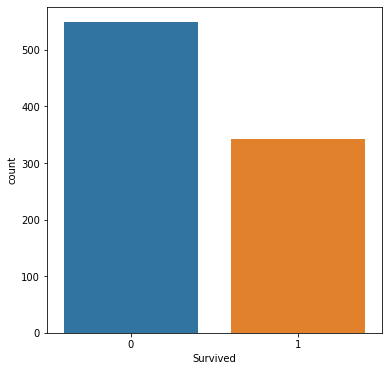

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='Survived', data=df)
plt.show()

# Plot Sex Column

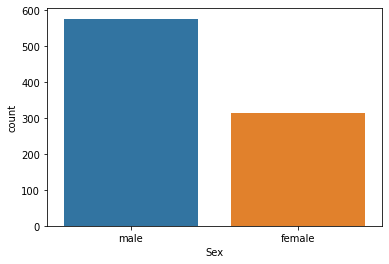

In [15]:
sns.countplot(x='Sex', data=df)
plt.show()

In [16]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

# Plot Graph of Servived and not survived Male, Female

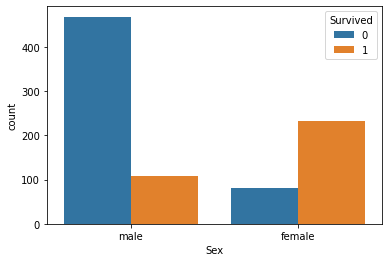

In [17]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

# Plot Pclass Column

<AxesSubplot: xlabel='Pclass', ylabel='count'>

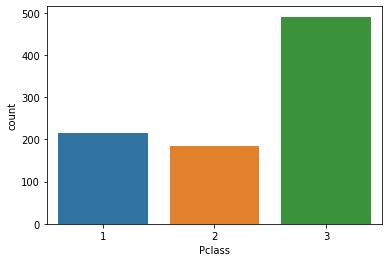

In [22]:
sns.countplot(x='Pclass', data=df)

<AxesSubplot: xlabel='Pclass', ylabel='count'>

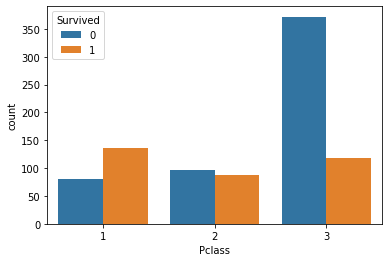

In [20]:
sns.countplot(x='Pclass', data=df, hue='Survived')

# Encoding Categorical Features

In [24]:
# check total number of categories in each column
print(df['Sex'].value_counts())

print(df['Embarked'].value_counts())



male      577
female    314
Name: Sex, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [26]:
df.replace({'Sex' : {'male' : 0, 'female' : 1}, 
           'Embarked' : {'S' : 0,'C' : 1, 'Q' : 2}}, inplace=True)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# Seperating Dependent and Independent Features

In [28]:
X = df.drop(columns=['PassengerId','Name','Ticket','Survived'], axis=1)
Y = df['Survived']

# Splitting Data to training and Testing Data

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2
                                                   , random_state=0)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


# Training Different Models on Data

# 1. Logistic Regression

In [34]:
lg = LogisticRegression()

In [35]:
lg.fit(X_train, Y_train)

LogisticRegression()

In [40]:
lg_pred = lg.predict(X_train)
lg_acc = accuracy_score(Y_train, lg_pred)
print("Accuracy of Logistic Regression on training data : ", lg_acc)

Accuracy of Logistic Regression on training data :  0.8033707865168539


In [41]:
lg_test_pred = lg.predict(X_test)
lg_test_acc = accuracy_score(Y_test, lg_test_pred)
print("Accuracy of Logistic Regression on Test data : ", lg_test_acc)

Accuracy of Logistic Regression on Test data :  0.8044692737430168


# Apply GridSearchCV for imporving Accuracy on Logistic regression

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

logistic_regression = LogisticRegression()
grid_search = GridSearchCV(estimator=logistic_regression, 
                param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [52]:
lg_pred = grid_search.predict(X_train)
lg_acc = accuracy_score(Y_train, lg_pred)
print("Accuracy of Logistic Regression on training data : ", lg_acc)

Accuracy of Logistic Regression on training data :  0.8061797752808989


In [53]:
lg_test_pred = grid_search.predict(X_test)
lg_test_acc = accuracy_score(Y_test, lg_test_pred)
print("Accuracy of Logistic Regression on Test data : ", lg_test_acc)

Accuracy of Logistic Regression on Test data :  0.8100558659217877


# 2. SVM Model

In [54]:
from sklearn.svm import SVC

In [66]:
svc = SVC(C=0.1, kernel='linear')

In [67]:
svc.fit(X_train, Y_train)

SVC(C=0.1, kernel='linear')

In [68]:
svc_pred = svc.predict(X_train)
svc_acc = accuracy_score(Y_train, svc_pred)
print("Training Accuracy of SVC : ", svc_acc)

Training Accuracy of SVC :  0.7865168539325843


In [69]:
svc_test_pred = svc.predict(X_train)
svc_test_acc = accuracy_score(Y_train, svc_test_pred)
print("Test Accuracy of SVC : ", svc_test_acc)

Test Accuracy of SVC :  0.7865168539325843


# Apply GridSearchCV for accuracy improvment

In [70]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': [2, 3, 4, 5]}


In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
print("Score : ", grid_search.best_score_)

In [ ]:
svc_pred = grid_search.predict(X_train)
svc_acc = accuracy_score(Y_train, svc_pred)
print("Training Accuracy of SVC : ", svc_acc)

In [ ]:
svc_test_pred = grid_search.predict(X_train)
svc_test_acc = accuracy_score(Y_train, svc_test_pred)
print("Test Accuracy of SVC : ", svc_test_acc)

# Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, Y_train)

In [ ]:
dt_train_pred = dt.predict(X_train)
dt_train_acc = accuracy_score(Y_train, dt_train_pred)
print("Training Accuracy of SVC : ", dt_train_acc)

In [ ]:
dt_test_pred = dt.predict(X_test)
dt_test_acc = accuracy_score(Y_train, dt_test_pred)
print("Test Accuracy of SVC : ", dt_test_acc)